# **Demand Forecasting and Inventory Optimization**

Persistent Deployment: For a more permanent deployment, consider hosting your Streamlit app on a cloud platform like Heroku, AWS, GCP, or Azure. These platforms provide more robust and scalable hosting solutions.

## STEP 1.

In [1]:
!pip install streamlit pandas numpy scikit-learn joblib matplotlib pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate dates
date_range = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')

# Generate fictitious sales data
np.random.seed(42)
sales = np.random.poisson(lam=100, size=len(date_range))

# Generate fictitious inventory data
inventory = np.random.randint(50, 150, size=len(date_range))

# Create a DataFrame
data = pd.DataFrame({
    'date': date_range,
    'sales': sales,
    'inventory': inventory
})


In [3]:
data.head()

,date,sales,inventory
0,2021-01-01,96,135
1,2021-01-02,107,80
2,2021-01-03,88,130
3,2021-01-04,103,104
4,2021-01-05,111,72


In [4]:
# Add seasonal and trend components
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Add seasonality (sales peaks in December and July)
data['sales'] = data['sales'] + np.where(data['month'] == 12, 50, 0)
data['sales'] = data['sales'] + np.where(data['month'] == 7, 30, 0)

# Add trend (increasing sales each year)
data['sales'] = data['sales'] + (data['year'] - 2021) * 10

# Save the data to a CSV file
data.to_csv('fictitious_sales_data.csv', index=False)

In [5]:
data.head()

,date,sales,inventory,month,year
0,2021-01-01,96,135,1,2021
1,2021-01-02,107,80,1,2021
2,2021-01-03,88,130,1,2021
3,2021-01-04,103,104,1,2021
4,2021-01-05,111,72,1,2021


##Modeling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('fictitious_sales_data.csv')

# Convert date to datetime type
data['date'] = pd.to_datetime(data['date'])

# Create additional features if necessary
data['day_of_week'] = data['date'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

# Select features and target
features = ['month', 'day_of_week', 'is_weekend', 'inventory']
target = 'sales'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Model Training with Performance Evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

## Make Prediction

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

# Save the trained model
joblib.dump(model, 'sales_forecast_model.pkl')

Mean Absolute Error (MAE): 11.70
Mean Squared Error (MSE): 212.84
Root Mean Squared Error (RMSE): 14.59
R-squared (R²): 0.49


['sales_forecast_model.pkl']

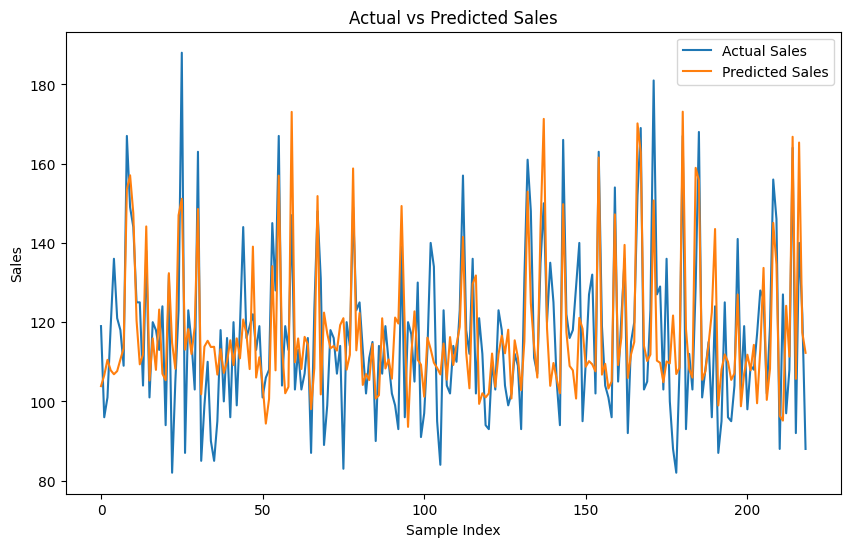

In [9]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

In [10]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)



Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [11]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Parameters: {best_params}')
print(f'Best Model Mean Absolute Error (MAE): {mae_best:.2f}')
print(f'Best Model Mean Squared Error (MSE): {mse_best:.2f}')
print(f'Best Model Root Mean Squared Error (RMSE): {rmse_best:.2f}')
print(f'Best Model R-squared (R²): {r2_best:.2f}')

Best Model Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Model Mean Absolute Error (MAE): 11.17
Best Model Mean Squared Error (MSE): 183.57
Best Model Root Mean Squared Error (RMSE): 13.55
Best Model R-squared (R²): 0.56


#Creating the app

In [12]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the pre-trained model
model = joblib.load('sales_forecast_model.pkl')

# Configure the Streamlit application
st.title('Demand Forecasting and Inventory Optimization')

st.write("""
## Instructions
1. Prepare a CSV file with the following columns:
   - **date**: The date of the record (e.g., YYYY-MM-DD).
   - **sales**: The actual sales figures for each date.
   - **inventory**: The inventory levels for each date.
2. Upload the CSV file using the file uploader below.
3. View the predictions and analysis.
""")

# Upload a CSV file
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
if uploaded_file is not None:
    # Read the CSV file
    input_data = pd.read_csv(uploaded_file)

    # Display the uploaded data
    st.write("Uploaded Data:")
    st.write(input_data.head())

    # Ensure the required columns are present
    required_columns = ['date', 'sales', 'inventory']
    if all(column in input_data.columns for column in required_columns):
        # Preprocess the data
        input_data['date'] = pd.to_datetime(input_data['date'])
        input_data['month'] = input_data['date'].dt.month
        input_data['day_of_week'] = input_data['date'].dt.dayofweek
        input_data['is_weekend'] = input_data['day_of_week'].isin([5, 6]).astype(int)
        features = ['month', 'day_of_week', 'is_weekend', 'inventory']

        scaler = StandardScaler()
        input_data_scaled = scaler.fit_transform(input_data[features])

        # Make predictions
        predictions = model.predict(input_data_scaled)
        input_data['predicted_sales'] = predictions

        # Display results
        st.write("Data with Predictions:")
        st.write(input_data)

        # Visualization
        st.write("Visualization of Actual vs Predicted Sales:")
        plt.figure(figsize=(12, 6))
        plt.plot(input_data['date'], input_data['sales'], label='Actual Sales')
        plt.plot(input_data['date'], input_data['predicted_sales'], label='Predicted Sales', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        st.pyplot(plt)

        # Forecasting future demand
        st.write("## Forecast Future Demand")
        forecast_period = st.selectbox("Select forecast period", ["3 months", "6 months", "1 year"])

        # Determine the number of days to forecast
        if forecast_period == "3 months":
            forecast_days = 90
        elif forecast_period == "6 months":
            forecast_days = 180
        else:
            forecast_days = 365

        # Generate future dates
        last_date = input_data['date'].max()
        future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)

        # Generate future data
        future_data = pd.DataFrame({
            'date': future_dates,
            'month': future_dates.month,
            'day_of_week': future_dates.dayofweek,
            'is_weekend': future_dates.dayofweek.isin([5, 6]).astype(int),
            'inventory': [input_data['inventory'].mean()] * forecast_days
        })

        # Scale future data
        future_data_scaled = scaler.transform(future_data[['month', 'day_of_week', 'is_weekend', 'inventory']])

        # Predict future sales
        future_predictions = model.predict(future_data_scaled)
        future_data['predicted_sales'] = future_predictions

        # Display future predictions
        st.write("Future Predictions:")
        st.write(future_data[['date', 'predicted_sales']])

        # Visualization of future predictions
        st.write("Visualization of Future Predictions:")
        plt.figure(figsize=(12, 6))
        plt.plot(future_data['date'], future_data['predicted_sales'], label='Predicted Sales')
        plt.xlabel('Date')
        plt.ylabel('Predicted Sales')
        plt.legend()
        plt.grid(True)
        st.pyplot(plt)
    else:
        st.write(f"Error: The uploaded file must contain the following columns: {', '.join(required_columns)}")

Writing streamlit_app.py


In [13]:
!ngrok authtoken 2i4MeUBPBRV3nSGceKXddDes9CR_2YX3xknWTWHCbBKD43kUw

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [14]:
!streamlit run streamlit_app.py --server.port 8501 &>/dev/null&
from pyngrok import ngrok

# Create tunnel to the Streamlit app
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://a6dd-34-32-213-235.ngrok-free.app" -> "http://localhost:8501">